# Unsupervised learning 

HE, Xiantao 1155132173

## Objectives
* Lecture 4--5 - Unsupervised Learning: Transformation & Clustering
* Design features to represent body shape (assume all body has the same height)
* Clustering

# Front view 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
ROOT_FOLDER = './gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/'

import glob
print('\nContents in the data folder:')
for x in glob.glob(ROOT_FOLDER+'data/*'):
    print(x)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/

Contents in the data folder:
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/data/train_kpt_front.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/data/train_kpt_side.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/data/train_img_front.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/data/train_img_side.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment3/data/README.txt


# Load data

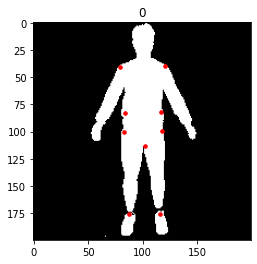

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def draw_points(image, kpts):
    plt.figure()
    plt.imshow(image, cmap='gray')
    keypoints = (kpts+0.5)*IMG_SIZE
    plt.title("{}".format(idx))
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')

# load front view data
IMG_SIZE = 200
IMG_S_TRAIN = np.load(ROOT_FOLDER+'data/train_img_front.npy')
IMG_S_TRAIN = np.unpackbits(IMG_S_TRAIN).reshape((-1,IMG_SIZE,IMG_SIZE))
KPT_S_TRAIN = np.load(ROOT_FOLDER+'data/train_kpt_front.npy')/IMG_SIZE - 0.5
 
# show one
idx = 0
draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])

# Feature design
1. waist/hip ratio
2. waist width
3. leg length

(array([  6.,  24.,  99., 181., 272., 249., 114.,  39.,  11.,   5.]),
 array([0.57417574, 0.6330987 , 0.69202167, 0.75094463, 0.80986759,
        0.86879055, 0.92771351, 0.98663647, 1.04555943, 1.10448239,
        1.16340535]),
 <a list of 10 Patch objects>)

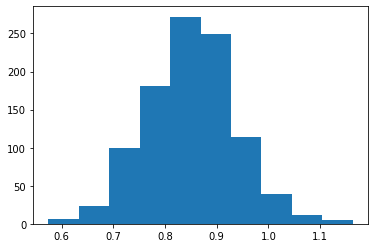

In [4]:
# feature1
# waist/hip ratio
wist=np.linalg.norm(KPT_S_TRAIN[:,2,:]-KPT_S_TRAIN[:,6,:],axis=1)
hip=np.linalg.norm(KPT_S_TRAIN[:,3,:]-KPT_S_TRAIN[:,7,:],axis=1)
feat1 = wist/hip
plt.hist(feat1,bins=10)

(array([  4.,  10.,  75., 200., 399., 207.,  80.,  18.,   6.,   1.]),
 array([0.06833333, 0.08839589, 0.10845845, 0.128521  , 0.14858356,
        0.16864612, 0.18870867, 0.20877123, 0.22883379, 0.24889634,
        0.2689589 ]),
 <a list of 10 Patch objects>)

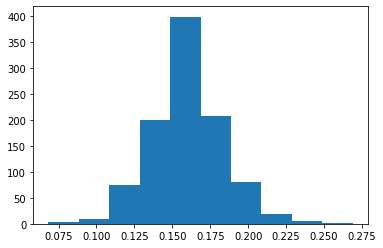

In [5]:
# feature2
# waist width
waist_width=np.linalg.norm(KPT_S_TRAIN[:,2,:]-KPT_S_TRAIN[:,6,:],axis=1)
feat2 = waist_width
plt.hist(feat2,bins=10)

(array([  4.,   8.,  21.,  78., 244., 420., 166.,  40.,  17.,   2.]),
 array([0.19503173, 0.2301779 , 0.26532406, 0.30047023, 0.3356164 ,
        0.37076257, 0.40590874, 0.44105491, 0.47620108, 0.51134725,
        0.54649342]),
 <a list of 10 Patch objects>)

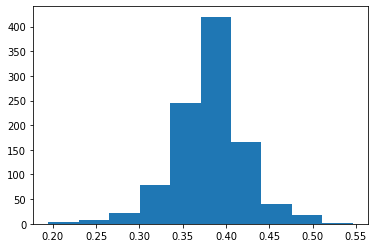

In [6]:
# feature3
# leg length
left_leg_length=np.linalg.norm(KPT_S_TRAIN[:,3,:]-KPT_S_TRAIN[:,4,:],axis=1)
right_leg_length=np.linalg.norm(KPT_S_TRAIN[:,7,:]-KPT_S_TRAIN[:,8,:],axis=1)
feat3 = (left_leg_length+right_leg_length)*0.5
plt.hist(feat3,bins=10)

# Clustering
1. Do Transform

(1). MinMaxScaler

(2). StandardScaler

(3). RobustScaler

(4). Normalizer

2. Choose different clustering model

(1). Kmeans

(2). Agglomerative clustering

(3). DBSCAN (proves not good when number of features >= 3)

3. Use Tsne to visualize


In [0]:
# create new data
feat = np.empty((KPT_S_TRAIN.shape[0],3))
feat[:,0] = feat1[:]
feat[:,1] = feat2[:]
feat[:,2] = feat3[:]

Standard scaler shows the best transform effect among all the transform skills

In [0]:
# Do transform
from sklearn.preprocessing import StandardScaler
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(feat.data)
feat = scaler.transform(feat.data)

I choose to classify 7 clusters by kmeans. It shows the best effect 

In [0]:
# Kmeans clustering
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree
kmeans = KMeans(n_clusters=7, random_state=0).fit(feat) 

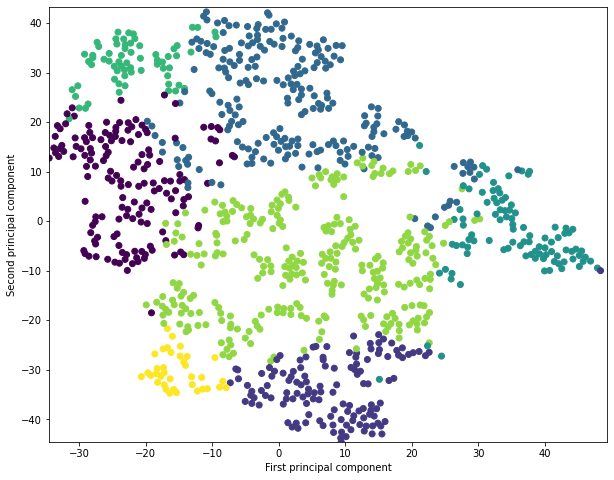

In [10]:
# Use Tsne to visualize when there are more than threee features 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42,learning_rate=300,n_iter=2000)
feat_tsne = tsne.fit_transform(feat.data)
plt.figure(figsize=(10, 8))
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541"]
plt.xlim(feat_tsne[:, 0].min(), feat_tsne[:, 0].max() + 1) 
plt.ylim(feat_tsne[:, 1].min(), feat_tsne[:, 1].max() + 1)
plt.scatter(feat_tsne[:, 0], feat_tsne[:, 1], c=kmeans.labels_)
plt.show()

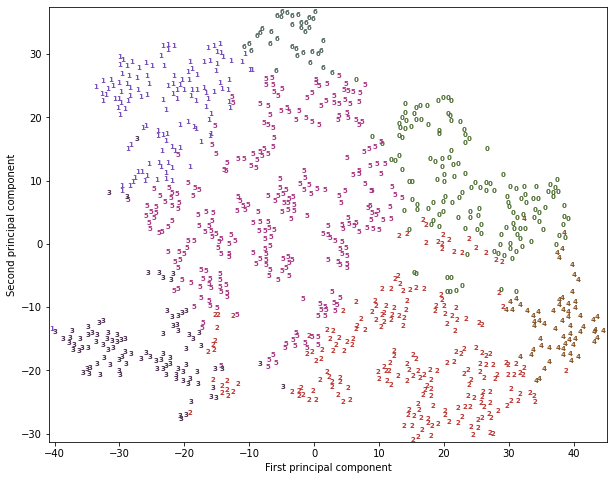

In [11]:
# Add text lable by TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)
feat_tsne = tsne.fit_transform(feat.data)
plt.figure(figsize=(10, 8))
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541"]
plt.xlim(feat_tsne[:, 0].min(), feat_tsne[:, 0].max() + 1) 
plt.ylim(feat_tsne[:, 1].min(), feat_tsne[:, 1].max() + 1)
#plt.scatter(feat_tsne[:, 0], feat_tsne[:, 1], c=kmeans.labels_)
#plt.show()

for i in range(len(feat.data)):
  plt.text(feat_tsne[i, 0], feat_tsne[i, 1], str(kmeans.labels_[i]),color = colors[kmeans.labels_[i]],
           fontdict={'weight': 'bold', 'size': 7})

Print each clusters' index

In [12]:
print(np.where(kmeans.labels_==0))
print(np.where(kmeans.labels_==1))
print(np.where(kmeans.labels_==2))
print(np.where(kmeans.labels_==3))
print(np.where(kmeans.labels_==4))
print(np.where(kmeans.labels_==5))
print(np.where(kmeans.labels_==6))

(array([  1,   2,  25,  28,  46,  52,  55,  66,  72,  78,  80, 101, 108,
       109, 111, 119, 127, 130, 134, 145, 159, 163, 175, 193, 194, 203,
       208, 236, 240, 241, 242, 245, 246, 255, 256, 281, 287, 292, 293,
       295, 301, 310, 321, 325, 326, 331, 332, 340, 342, 344, 353, 359,
       371, 377, 378, 389, 392, 394, 395, 402, 405, 420, 427, 434, 439,
       441, 442, 455, 460, 464, 468, 470, 489, 494, 495, 499, 503, 513,
       522, 528, 549, 550, 564, 571, 572, 574, 575, 592, 596, 599, 611,
       612, 616, 622, 626, 637, 638, 647, 649, 664, 672, 676, 683, 693,
       701, 707, 714, 731, 737, 740, 744, 745, 753, 754, 766, 767, 779,
       785, 787, 788, 790, 793, 796, 800, 810, 839, 842, 848, 853, 857,
       859, 860, 865, 872, 877, 884, 898, 900, 901, 906, 915, 938, 944,
       957, 968, 974, 976, 978, 980, 983, 985, 993]),)
(array([  6,   9,  12,  30,  58,  60,  68,  89,  98, 103, 118, 126, 133,
       141, 143, 144, 158, 172, 183, 187, 188, 189, 198, 205, 211, 214,
       

Choose three cluster and subplot part of them to see the outcomes

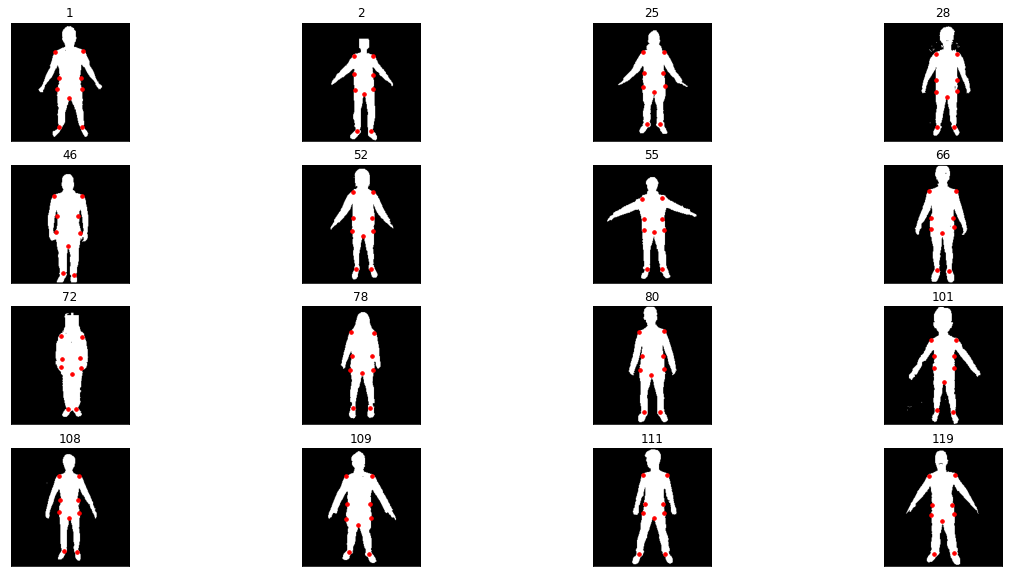

In [13]:
# subplot 16 images of the first cluster
cluster1_idx=[1,   2,  25,  28,  46,  52,  55,  66,  72,  78,  80, 101, 108,
       109, 111, 119]
fig, axes = plt.subplots(4, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(cluster1_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

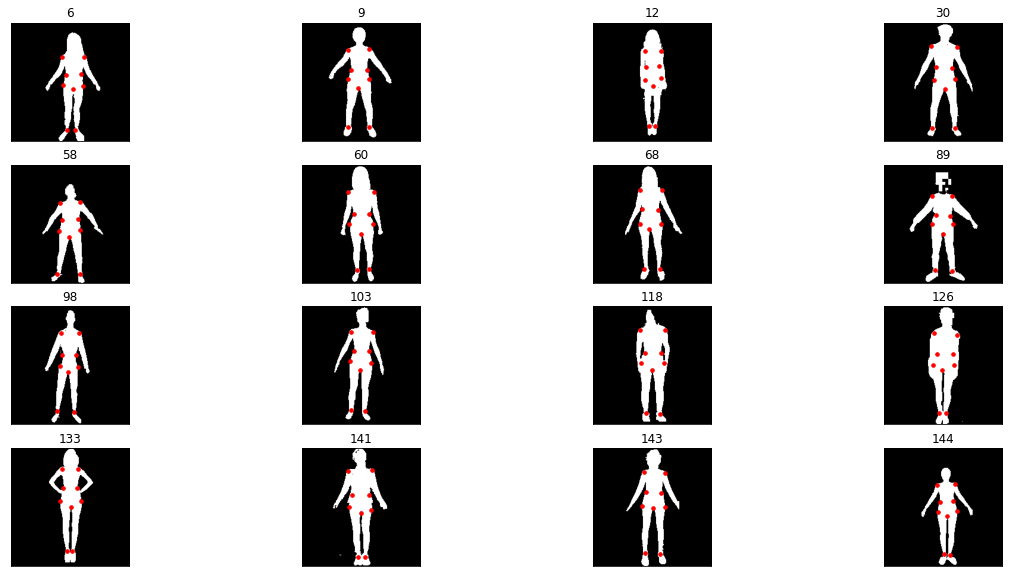

In [14]:
# subplot 16 images of the second cluster
cluster2_idx=[6,   9,  12,  30,  58,  60,  68,  89,  98, 103, 118, 126, 133,
       141, 143, 144]
fig, axes = plt.subplots(4, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(cluster2_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

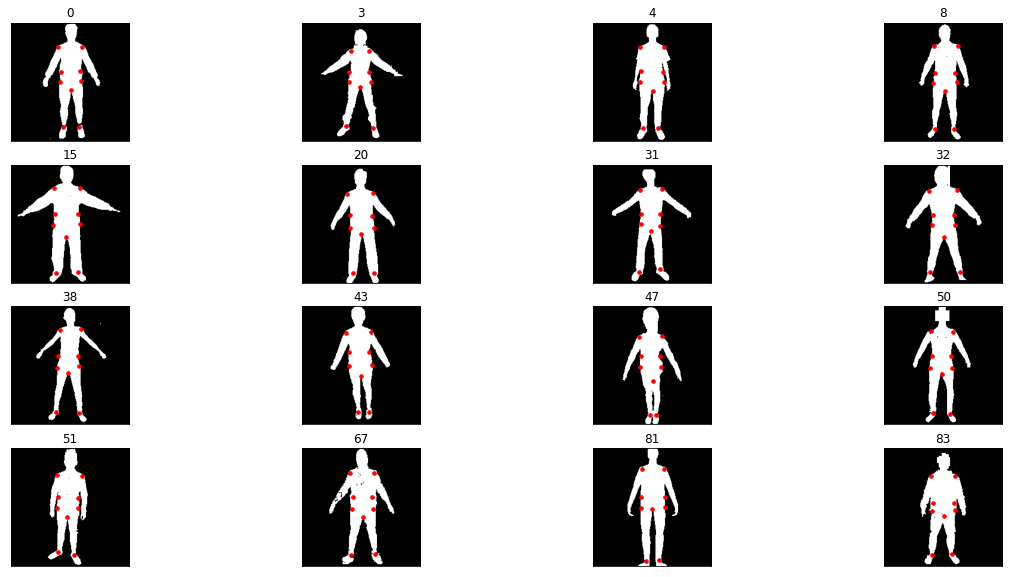

In [15]:
# subplot 16 images of the third cluster
cluster3_idx=[0,   3,   4,   8,  15,  20,  31,  32,  38,  43,  47,  50,  51,
        67,  81,  83]
fig, axes = plt.subplots(4, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(cluster3_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Detect outlier

# Det_feature 1
the distcance between two feet will detect 

most of outliers since images are always 

marked the wrong location of feet.

(array([ 55., 148., 336., 268., 142.,  39.,   8.,   2.,   1.,   1.]),
 array([0.03337497, 0.06988789, 0.10640081, 0.14291373, 0.17942664,
        0.21593956, 0.25245248, 0.2889654 , 0.32547831, 0.36199123,
        0.39850415]),
 <a list of 10 Patch objects>)

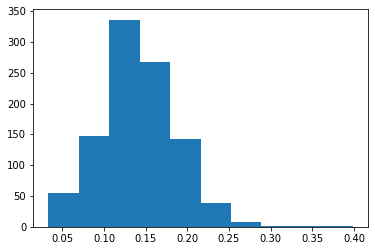

In [16]:
# the distance between two feat
feat_det1 = np.linalg.norm((KPT_S_TRAIN[:,4,:]-KPT_S_TRAIN[:,8,:]), axis=1)
plt.hist(feat_det1,bins=10)

In [17]:
# print the idx of images of outliers
print(np.where(np.logical_and(feat_det1>0.25,feat_det1<=0.40)))
print(np.where(np.logical_and(feat_det1<=0.05,feat_det1>=0)))

(array([ 32,  87,  95, 112, 159, 292, 469, 617, 680, 787, 862, 911]),)
(array([133, 144, 155, 275, 436, 445, 467, 472, 488, 717, 797]),)


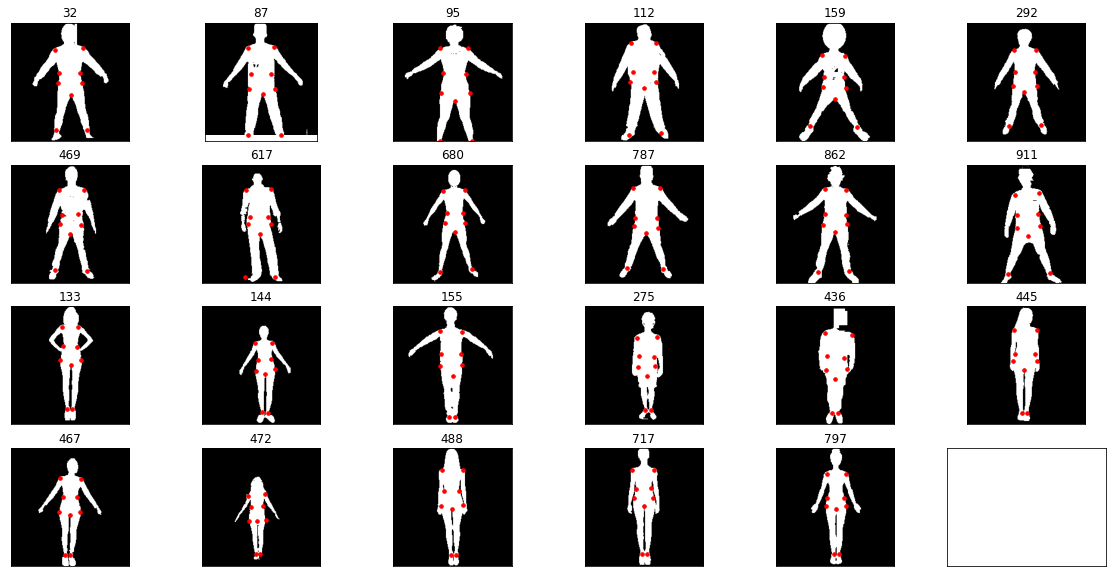

In [18]:
# subplot the first feature outliers 
outlier1_idx=[32,  87,  95, 112, 159, 292, 469, 617, 680, 787, 862, 911,133, 144, 
            155, 275, 436, 445, 467, 472, 488, 717, 797]
fig, axes = plt.subplots(4, 6, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlier1_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Det_feature 2

The second detect feature is the distance between crotch and hip.

A lot of outliers are marked wrong location of hip point

(array([ 12.,  51., 168., 261., 235., 181.,  67.,  17.,   5.,   3.]),
 array([0.00186339, 0.01637777, 0.03089215, 0.04540653, 0.05992091,
        0.07443529, 0.08894966, 0.10346404, 0.11797842, 0.1324928 ,
        0.14700718]),
 <a list of 10 Patch objects>)

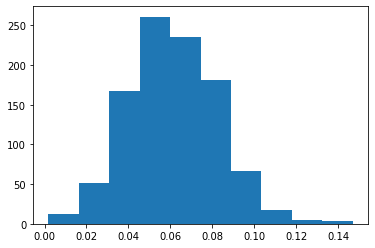

In [19]:
# the distance between point 0 to point 3 and 7
feat_det2 = np.linalg.norm((KPT_S_TRAIN[:,3,:]+KPT_S_TRAIN[:,7,:])*0.5-KPT_S_TRAIN[:,0,:], axis=1)
plt.hist(feat_det2,bins=10)

plot the idx of outliers

In [20]:
print(np.where(np.logical_and(feat_det2>0,feat_det2<=0.02)))
print(np.where(np.logical_and(feat_det2<0.15,feat_det2>=0.11)))

(array([ 81, 143, 180, 206, 237, 421, 428, 472, 511, 516, 710, 739, 766,
       972]),)
(array([ 15,  46,  47, 100, 101, 113, 213, 354, 515, 671, 679, 792, 806,
       811, 855, 906, 921, 933, 961, 968]),)


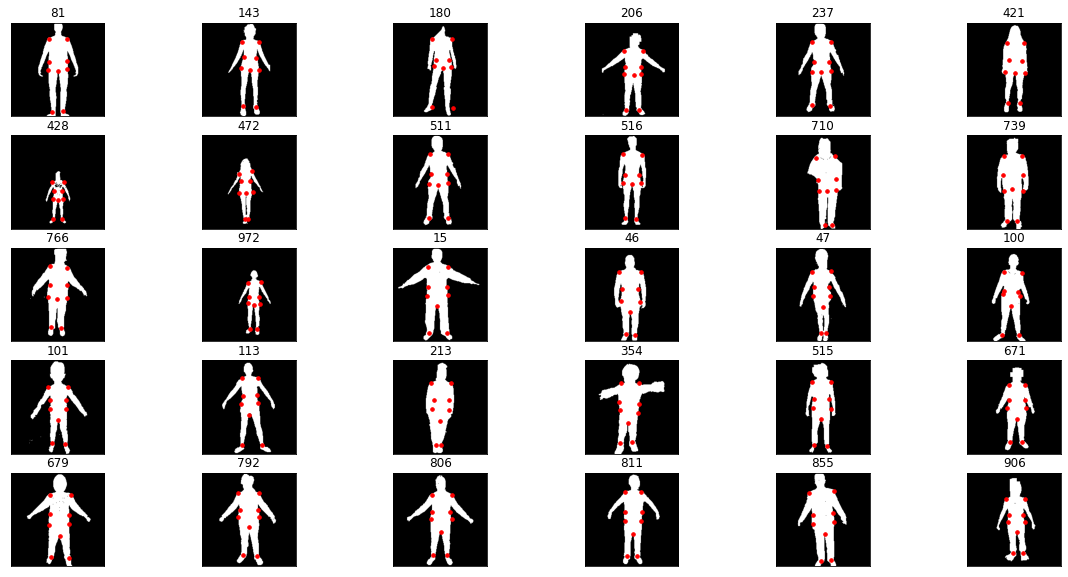

In [21]:
# subplot the second outliers
outlier2_idx=[81, 143, 180, 206, 237, 421, 428, 472, 511, 516, 710, 739, 766,
       972,15,  46,  47, 100, 101, 113, 213, 354, 515, 671, 679, 792, 806,
       811, 855, 906, 921, 933, 961, 968]
fig, axes = plt.subplots(5, 6, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlier2_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Det_feature 3
The distance between crotch and waist

(array([ 11.,  40., 132., 224., 296., 191.,  67.,  25.,  10.,   4.]),
 array([0.08168367, 0.09868418, 0.11568469, 0.13268519, 0.1496857 ,
        0.16668621, 0.18368671, 0.20068722, 0.21768773, 0.23468823,
        0.25168874]),
 <a list of 10 Patch objects>)

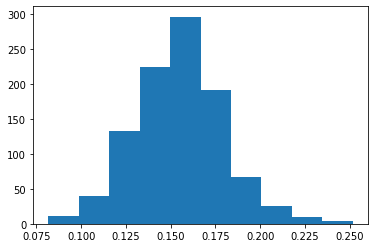

In [25]:
# the distance between crotch and waist
dis=np.linalg.norm((KPT_S_TRAIN[:,2,:]+KPT_S_TRAIN[:,6,:])*0.5-KPT_S_TRAIN[:,0,:], axis=1)
feat_det3 = dis
plt.hist(feat_det3,bins=10)

In [26]:
print(np.where(np.logical_and(feat_det3>0,feat_det3<0.1)))
print(np.where(np.logical_and(feat_det3<0.3,feat_det3>=0.2)))

(array([180, 206, 310, 428, 493, 516, 646, 719, 797, 972, 976]),)
(array([ 15,  34,  43,  46,  47,  95, 101, 113, 157, 183, 213, 236, 256,
       257, 354, 430, 440, 450, 515, 532, 542, 559, 607, 624, 654, 674,
       679, 681, 740, 783, 806, 811, 815, 831, 855, 904, 921, 934, 938,
       941, 961, 980, 987, 994]),)


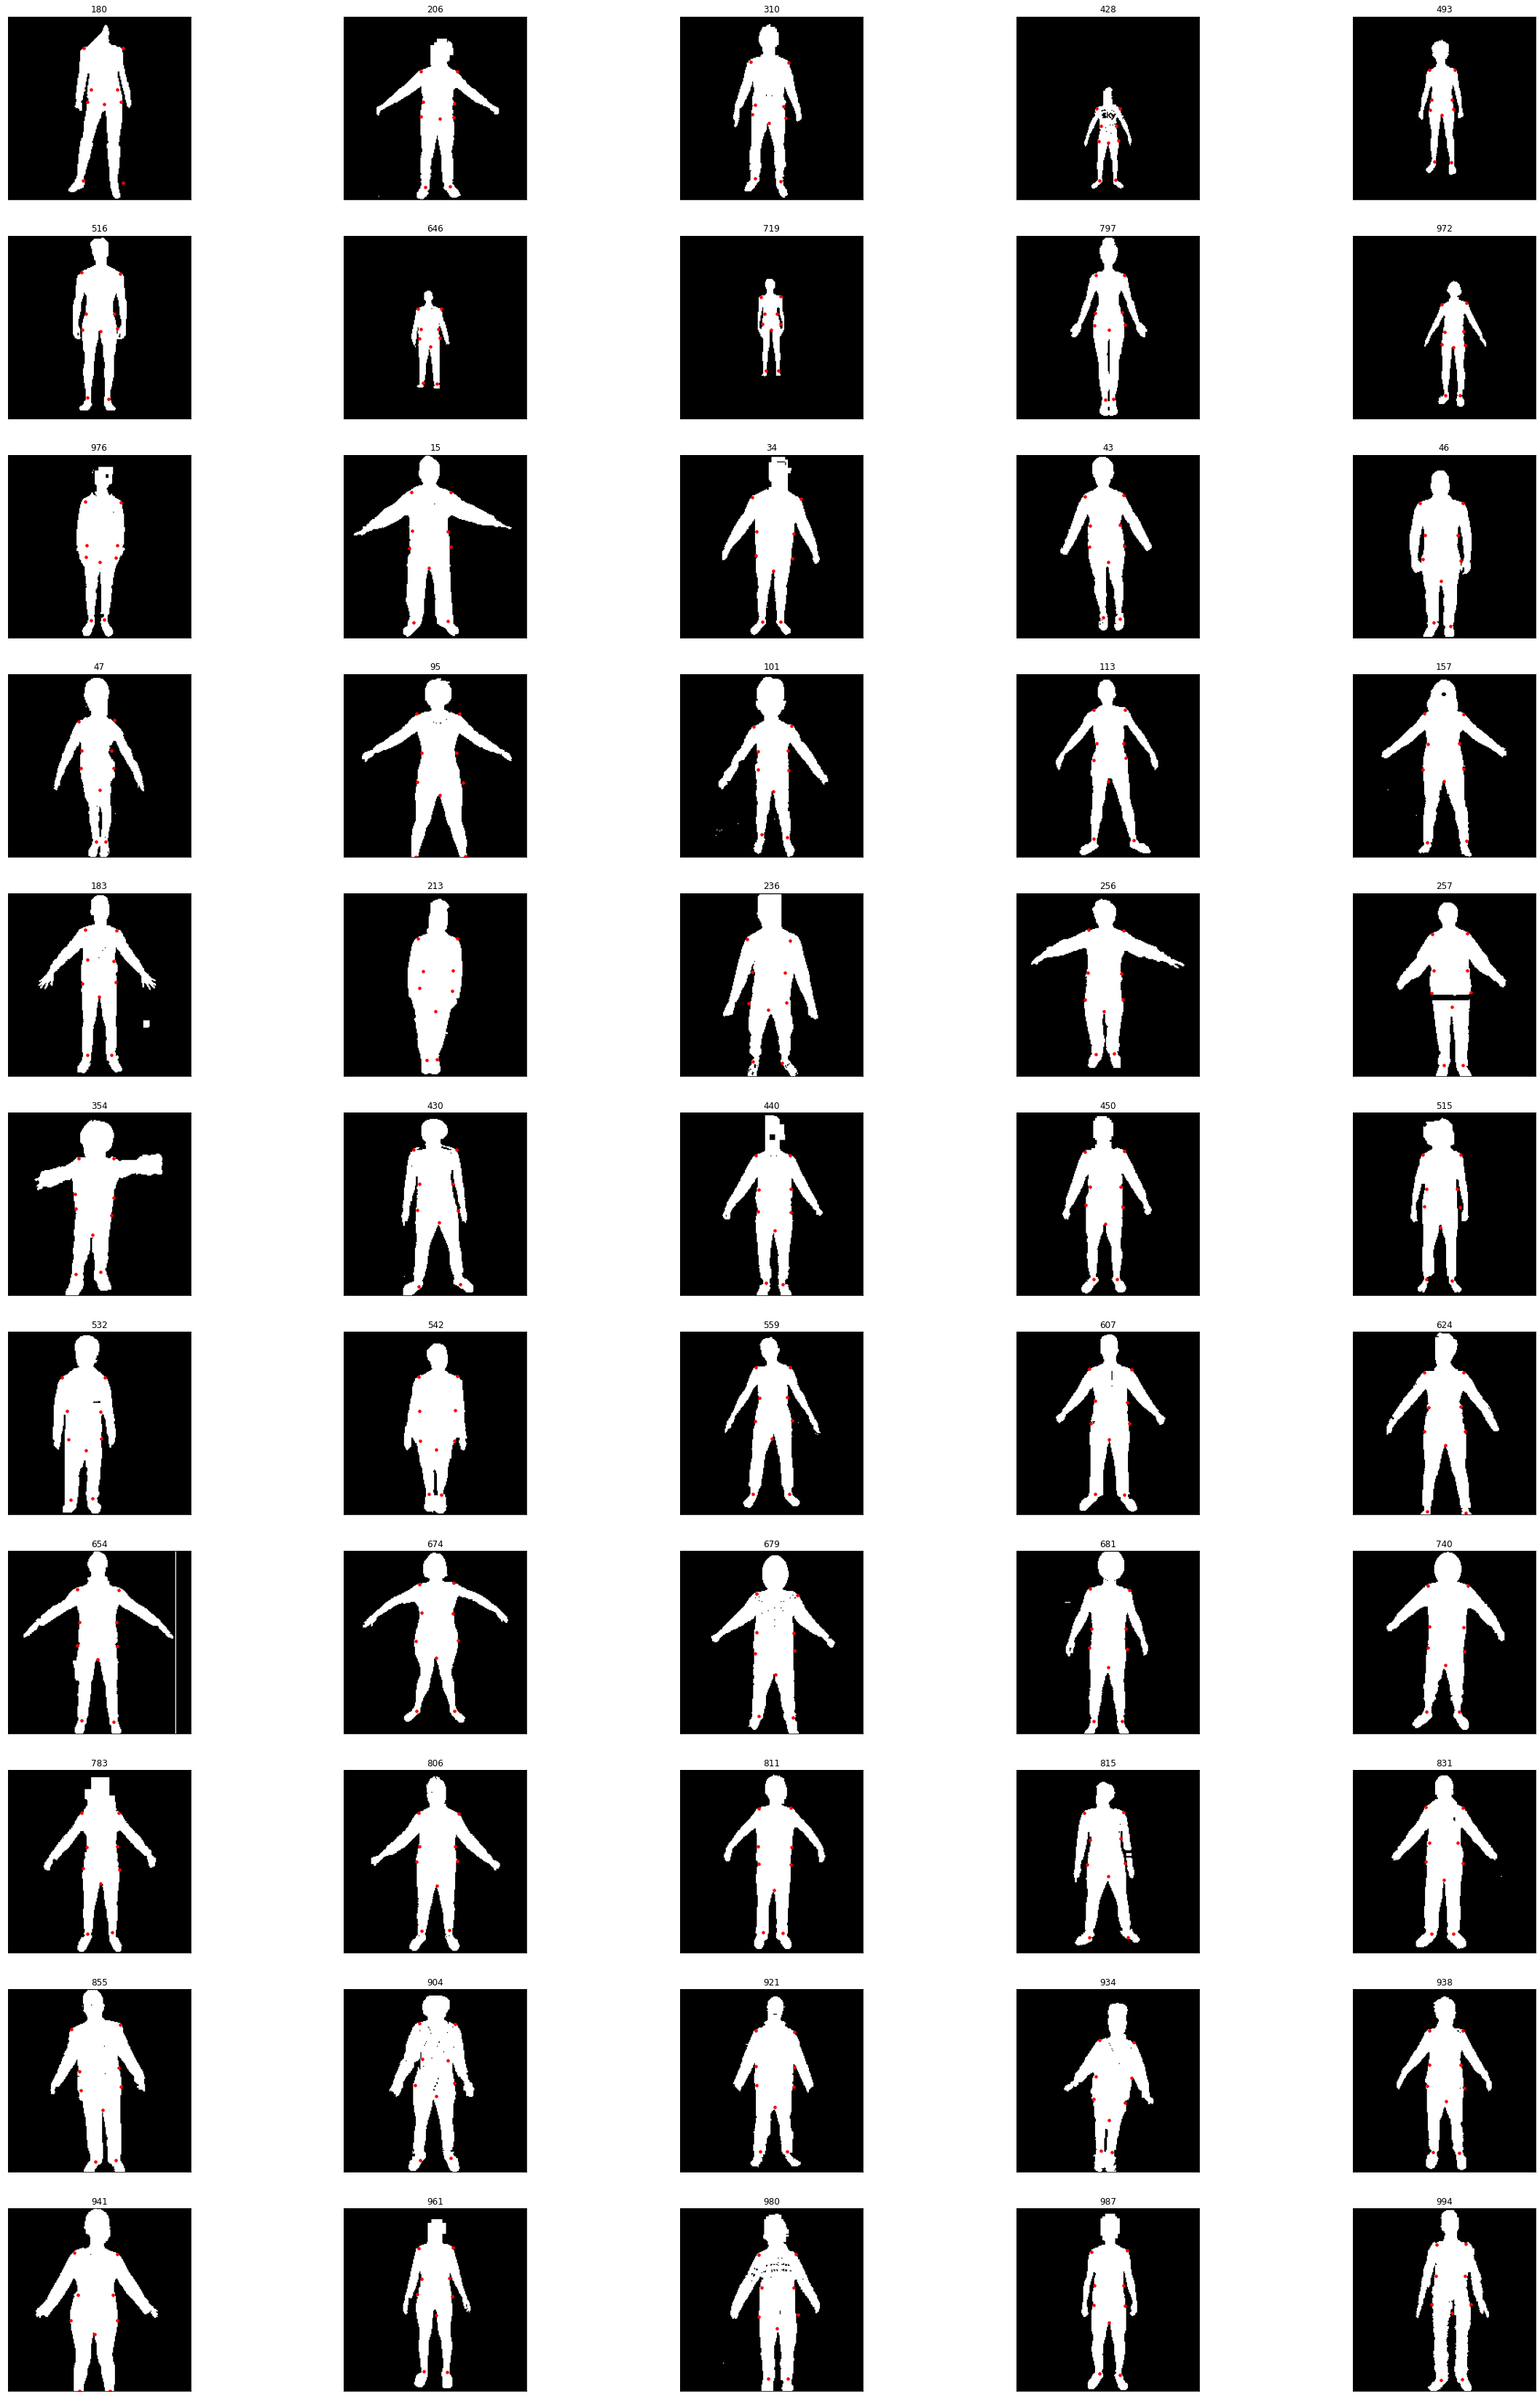

In [28]:
outlier3_idx=[180, 206, 310, 428, 493, 516, 646, 719, 797, 972, 976,
              15,  34,  43,  46,  47,  95, 101, 113, 157, 183, 213, 236, 256,
       257, 354, 430, 440, 450, 515, 532, 542, 559, 607, 624, 654, 674,
       679, 681, 740, 783, 806, 811, 815, 831, 855, 904, 921, 934, 938,
       941, 961, 980, 987, 994]
fig, axes = plt.subplots(11, 5, figsize=(40, 60),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlier3_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Plot top-30 outliers of front view

By viewing three output through detecting features 

I manually choose top-30 outliers

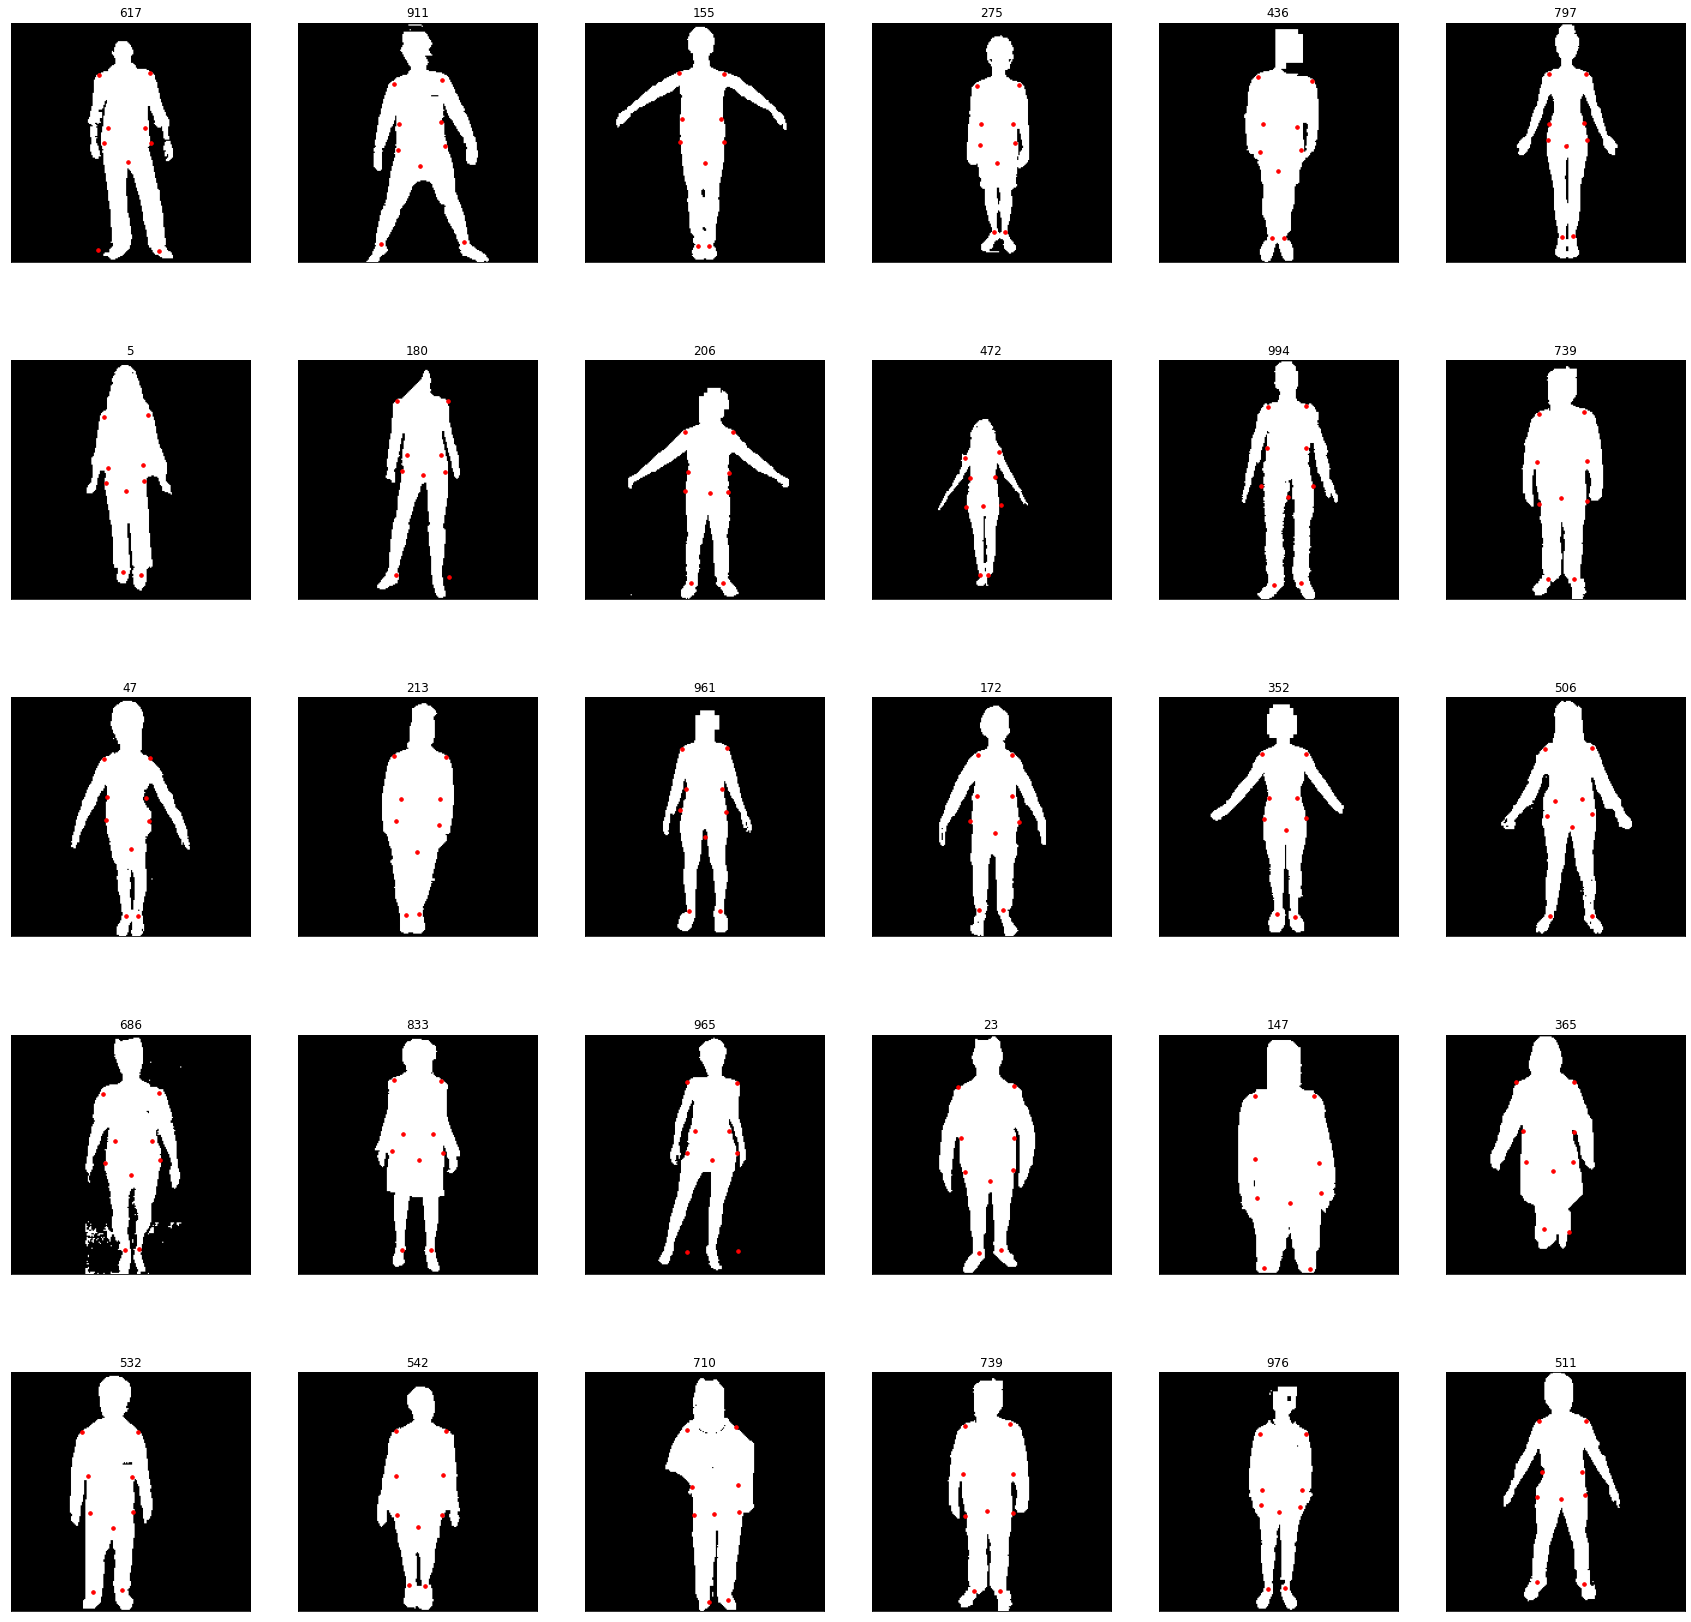

In [51]:
# By viewing three detecting features
# plot top-30 outliers
outlierall_idx=[617,911,155,275,436,797,5,180,206,472,
            994,739,47,213,961,172,352,506,686,833,
            965,23,147,365,532,542,710,739,976,511]
fig, axes = plt.subplots(5, 6, figsize=(30, 30),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlierall_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Side view

load data

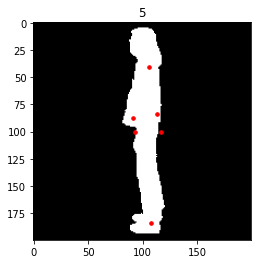

In [30]:
# load side view data
IMG_SIZE = 200
IMG_S_TRAIN = np.load(ROOT_FOLDER+'data/train_img_side.npy')
IMG_S_TRAIN = np.unpackbits(IMG_S_TRAIN).reshape((-1,IMG_SIZE,IMG_SIZE))
KPT_S_TRAIN = np.load(ROOT_FOLDER+'data/train_kpt_side.npy')/IMG_SIZE - 0.5
 
# show one
idx = 5
draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])

# Side view feature design

feature 1 for side view

leg length

'\nfor v in np.arange(0.4,0.7,0.05):\n  idx = np.where(np.logical_and(feat1>=v, feat1<v+0.01))[0][0]\n  draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])\n'

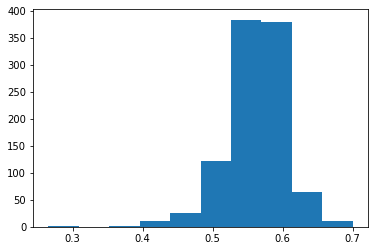

In [31]:
# leg length
height = np.linalg.norm(KPT_S_TRAIN[:,0,:]-KPT_S_TRAIN[:,5,:], axis=1) 
feat1_side = np.linalg.norm((KPT_S_TRAIN[:,2,:]+KPT_S_TRAIN[:,4,:])*0.5-KPT_S_TRAIN[:,5,:], axis=1)/height
plt.hist(feat1_side,bins=10)
'''
for v in np.arange(0.4,0.7,0.05):
  idx = np.where(np.logical_and(feat1>=v, feat1<v+0.01))[0][0]
  draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])
'''

Feature 2 for side view

waist/hip ratio

'\nfor v in np.arange(0.7,1.4,0.1):\n  idx = np.where(np.logical_and(feat2>=v, feat2<v+0.01))[0][0]\n  draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])\n'

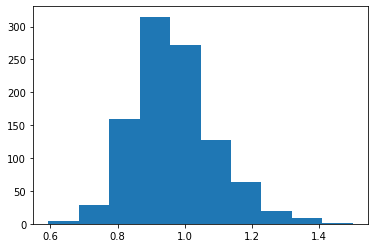

In [32]:
# waist/hip ratio
feat2_side = np.linalg.norm(KPT_S_TRAIN[:,1,:]-KPT_S_TRAIN[:,3,:], axis=1)/np.linalg.norm(KPT_S_TRAIN[:,2,:]-KPT_S_TRAIN[:,4,:], axis=1)
plt.hist(feat2_side,bins=10)
'''
for v in np.arange(0.7,1.4,0.1):
  idx = np.where(np.logical_and(feat2>=v, feat2<v+0.01))[0][0]
  draw_points(IMG_S_TRAIN[idx,:,:], KPT_S_TRAIN[idx,:,:])
'''

feature 3 for side view

height


(array([  3.,   3.,  10.,  20., 122., 409., 338.,  69.,  19.,   7.]),
 array([0.40833673, 0.4611279 , 0.51391907, 0.56671024, 0.61950141,
        0.67229258, 0.72508375, 0.77787492, 0.83066609, 0.88345725,
        0.93624842]),
 <a list of 10 Patch objects>)

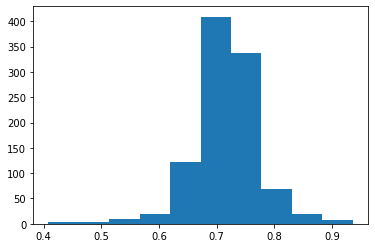

In [33]:
# height
feat3_side = np.linalg.norm(KPT_S_TRAIN[:,0,:]-KPT_S_TRAIN[:,5,:], axis=1) 
plt.hist(feat3_side,bins=10)

In [0]:
# create new side view data
feat_side = np.empty((KPT_S_TRAIN.shape[0],3))
feat_side[:,0] = feat1_side[:]
feat_side[:,1] = feat2_side[:]
feat_side[:,2] = feat3_side[:]

Normalizer shows the best transform effect of image

In [0]:
# Do transform
from sklearn.preprocessing import Normalizer
# rescale the data to zero mean and unit variance
Norm = Normalizer()
Norm.fit(feat_side.data)
feat_side = Norm.transform(feat_side.data)

Three clusters shows the best effect of kmeans in side view

In [0]:
# Kmeans clustering
kmeans_side = KMeans(n_clusters=3, random_state=0).fit(feat_side)

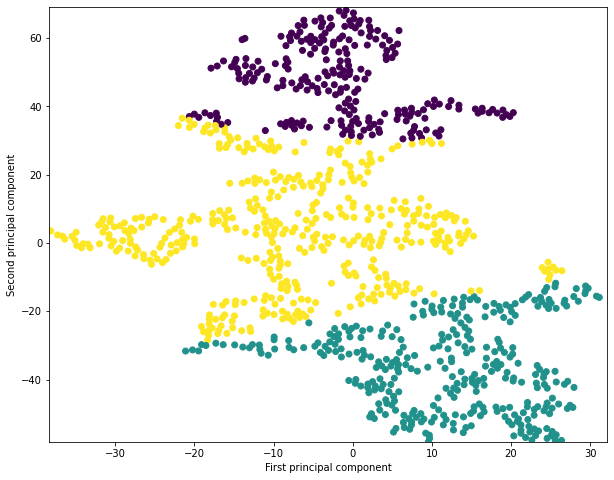

In [37]:
# TSNE
tsne = TSNE(n_components=2,random_state=42,learning_rate=300,n_iter=2000)
featside_tsne = tsne.fit_transform(feat_side.data)
plt.figure(figsize=(10, 8))
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541"]
plt.xlim(featside_tsne[:, 0].min(), featside_tsne[:, 0].max() + 1) 
plt.ylim(featside_tsne[:, 1].min(), featside_tsne[:, 1].max() + 1)
plt.scatter(featside_tsne[:, 0], featside_tsne[:, 1], c=kmeans_side.labels_)
plt.show()

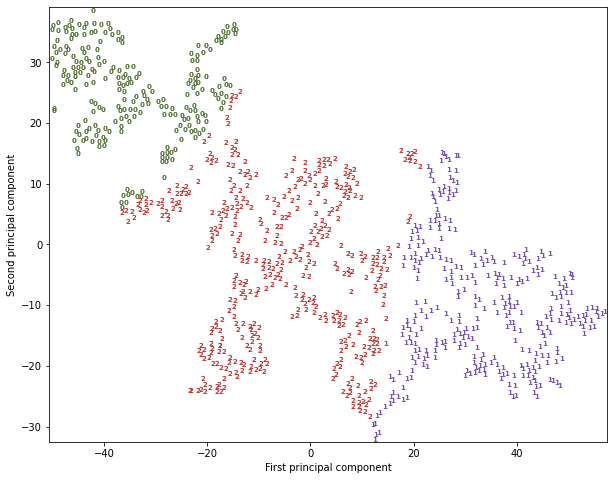

In [39]:
# Add text label by TSNE
# TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)
featside_tsne = tsne.fit_transform(feat_side.data)
plt.figure(figsize=(10, 8))
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
colors = ["#476A2A", "#7851B8", "#BD3430"]
plt.xlim(featside_tsne[:, 0].min(), featside_tsne[:, 0].max() + 1) 
plt.ylim(featside_tsne[:, 1].min(), featside_tsne[:, 1].max() + 1)
for i in range(len(feat_side.data)):
  plt.text(featside_tsne[i, 0], featside_tsne[i, 1], str(kmeans_side.labels_[i]),color = colors[kmeans_side.labels_[i]],
           fontdict={'weight': 'bold', 'size': 7})

# detect outlier

first det_feature Waist length

(array([  9.,  55., 190., 394., 208.,  90.,  40.,   8.,   2.,   4.]),
 array([0.05666667, 0.07633388, 0.0960011 , 0.11566831, 0.13533553,
        0.15500274, 0.17466996, 0.19433717, 0.21400439, 0.2336716 ,
        0.25333882]),
 <a list of 10 Patch objects>)

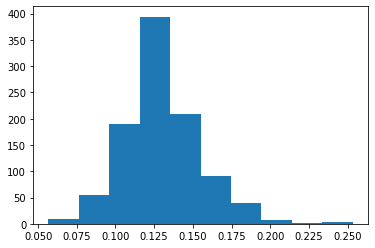

In [41]:
# Waist length
feat1_det_side = np.linalg.norm(KPT_S_TRAIN[:,1,:]-KPT_S_TRAIN[:,3,:], axis=1) 
plt.hist(feat1_det_side,bins=10)

In [42]:
# print the idx of outliers1
print(np.where(np.logical_and(feat1_det_side>0.05,feat1_det_side<0.08)))
print(np.where(np.logical_and(feat1_det_side<0.3,feat1_det_side>=0.175)))

(array([ 33, 144, 158, 185, 332, 349, 428, 467, 472, 493, 539, 628, 719,
       850, 969, 972]),)
(array([ 15,  23,  37,  46,  75, 136, 147, 154, 156, 201, 309, 316, 327,
       354, 365, 379, 387, 389, 392, 399, 403, 437, 439, 473, 481, 521,
       528, 535, 563, 565, 587, 606, 612, 642, 701, 716, 768, 773, 777,
       779, 785, 806, 820, 855, 885, 891, 919, 924, 931, 947, 962, 980,
       982, 984]),)


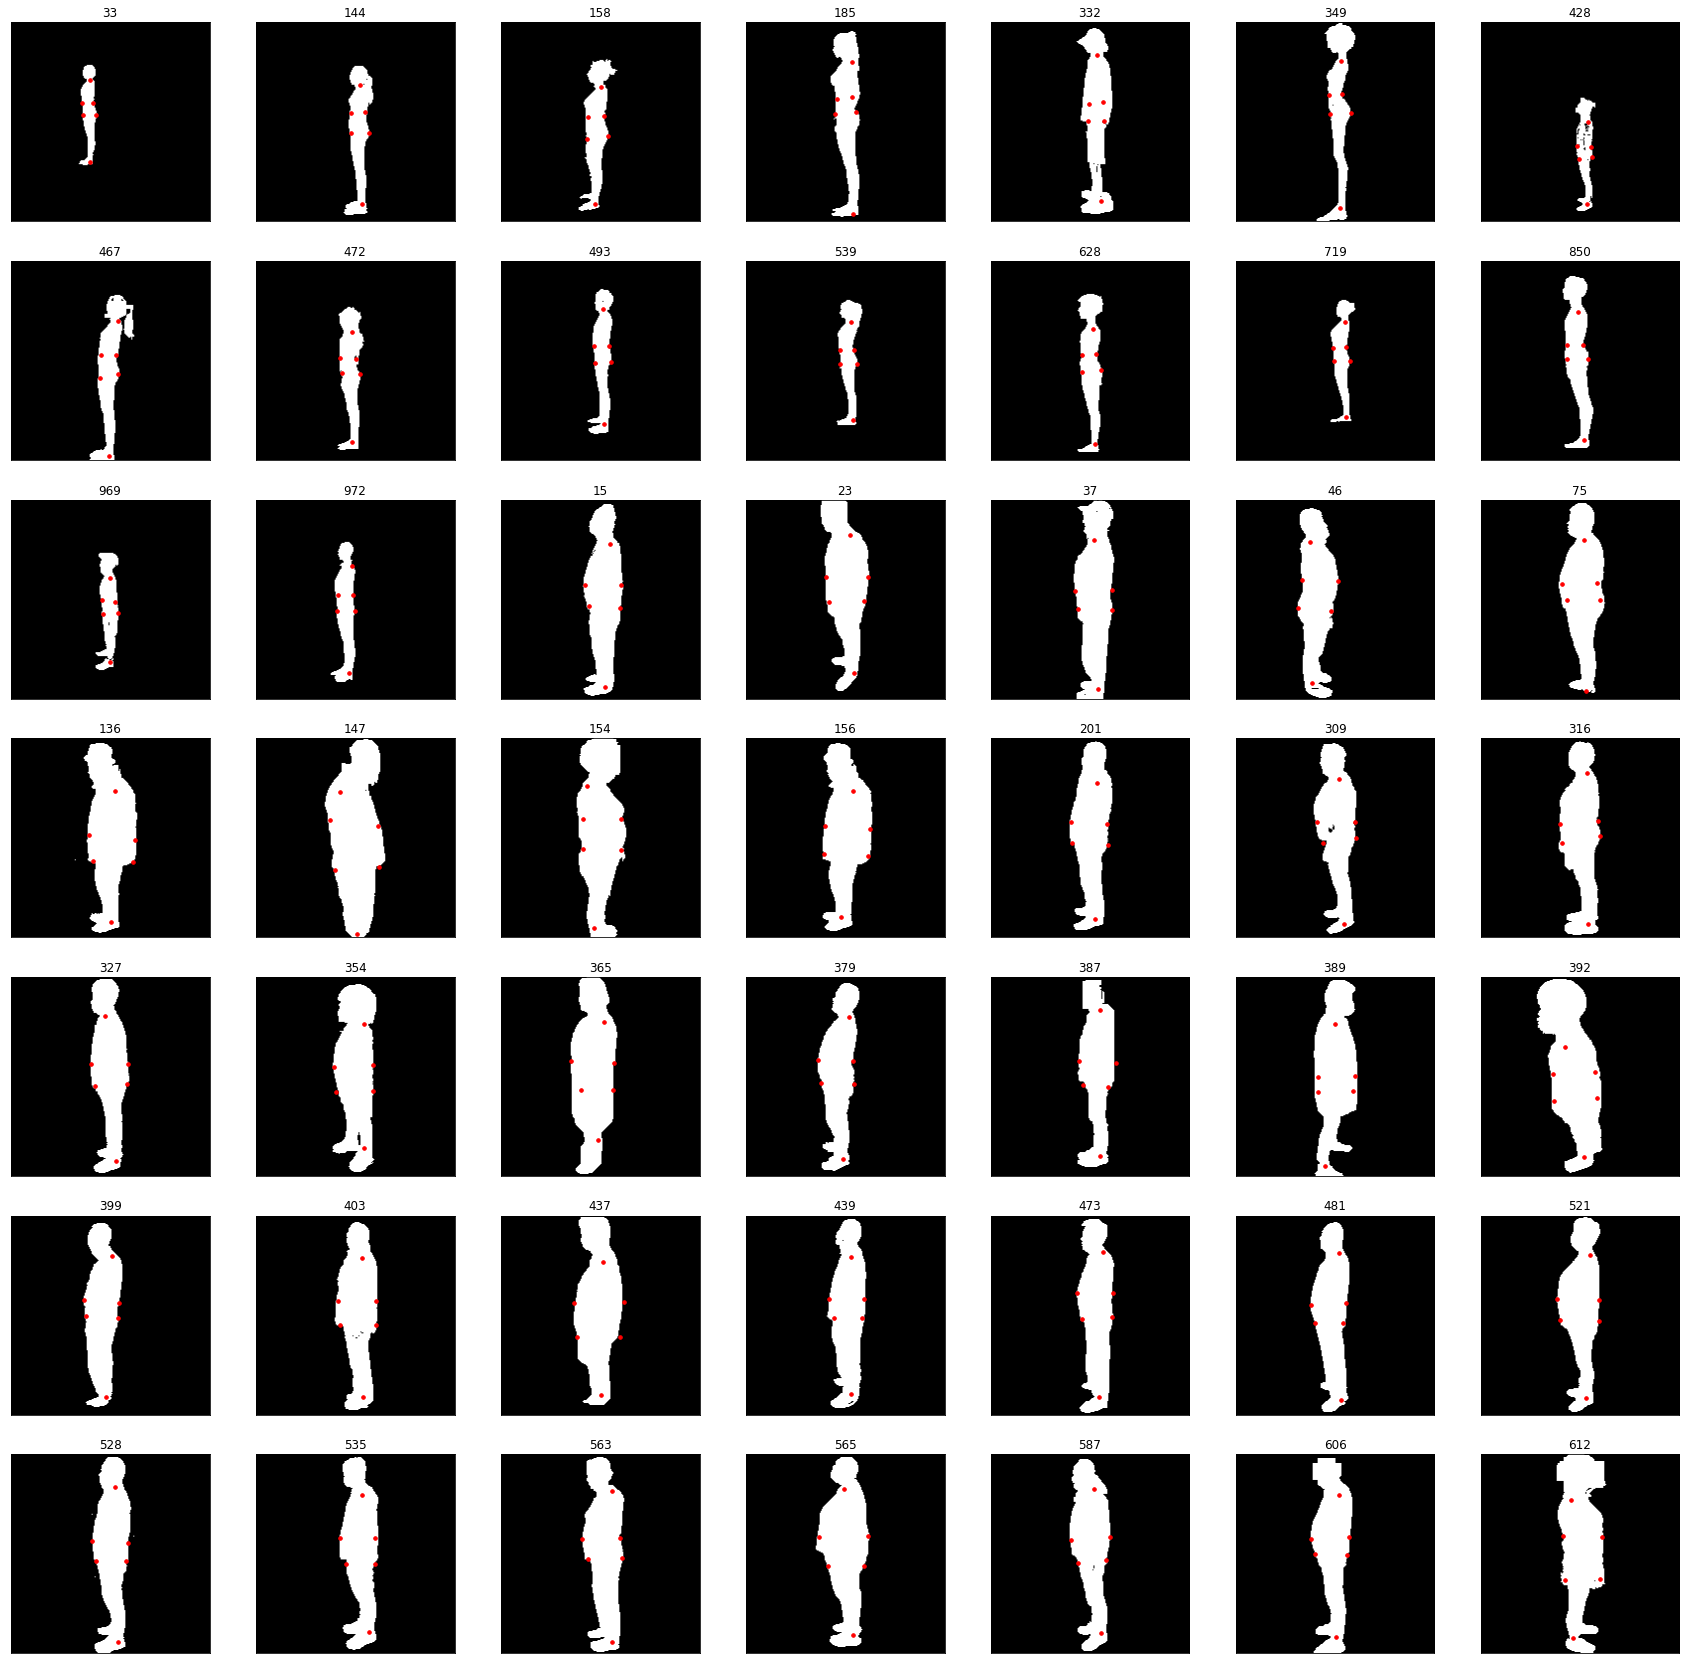

In [43]:
# subplot the first feature outlier
outlier_side1_idx=[33, 144, 158, 185, 332, 349, 428, 467, 472, 493, 539, 628, 719,
       850, 969, 972,15,  23,  37,  46,  75, 136, 147, 154, 156, 201, 309, 316, 327,
       354, 365, 379, 387, 389, 392, 399, 403, 437, 439, 473, 481, 521,
       528, 535, 563, 565, 587, 606, 612, 642, 701, 716, 768, 773, 777,
       779, 785, 806, 820, 855, 885, 891, 919, 924, 931, 947, 962, 980,
       982, 984]
fig, axes = plt.subplots(7, 7, figsize=(30, 30),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlier_side1_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

Second det_feature 

The distance between shoulder to waist

(array([  8.,  13., 107., 425., 353.,  72.,  18.,   3.,   0.,   1.]),
 array([0.07163274, 0.10897072, 0.14630869, 0.18364667, 0.22098464,
        0.25832261, 0.29566059, 0.33299856, 0.37033654, 0.40767451,
        0.44501248]),
 <a list of 10 Patch objects>)

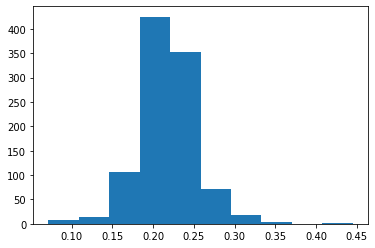

In [44]:
feat2_det_side=np.linalg.norm((KPT_S_TRAIN[:,1,:]+KPT_S_TRAIN[:,3,:])*0.5-KPT_S_TRAIN[:,0,:], axis=1)
plt.hist(feat2_det_side,bins=10)

In [45]:
print(np.where(np.logical_and(feat2_det_side>0,feat2_det_side<0.1499)))
print(np.where(np.logical_and(feat2_det_side<0.5,feat2_det_side>=0.28)))

(array([ 16,  33, 122, 144, 237, 287, 392, 427, 428, 472, 504, 511, 524,
       539, 569, 575, 589, 592, 628, 719, 739, 766, 825, 969, 971, 972]),)
(array([ 27,  85,  87,  96, 104, 165, 263, 290, 294, 303, 331, 382, 409,
       492, 536, 564, 626, 677, 710, 729, 730, 735, 796, 834, 855, 856,
       862, 873, 874, 914, 926, 941, 989]),)


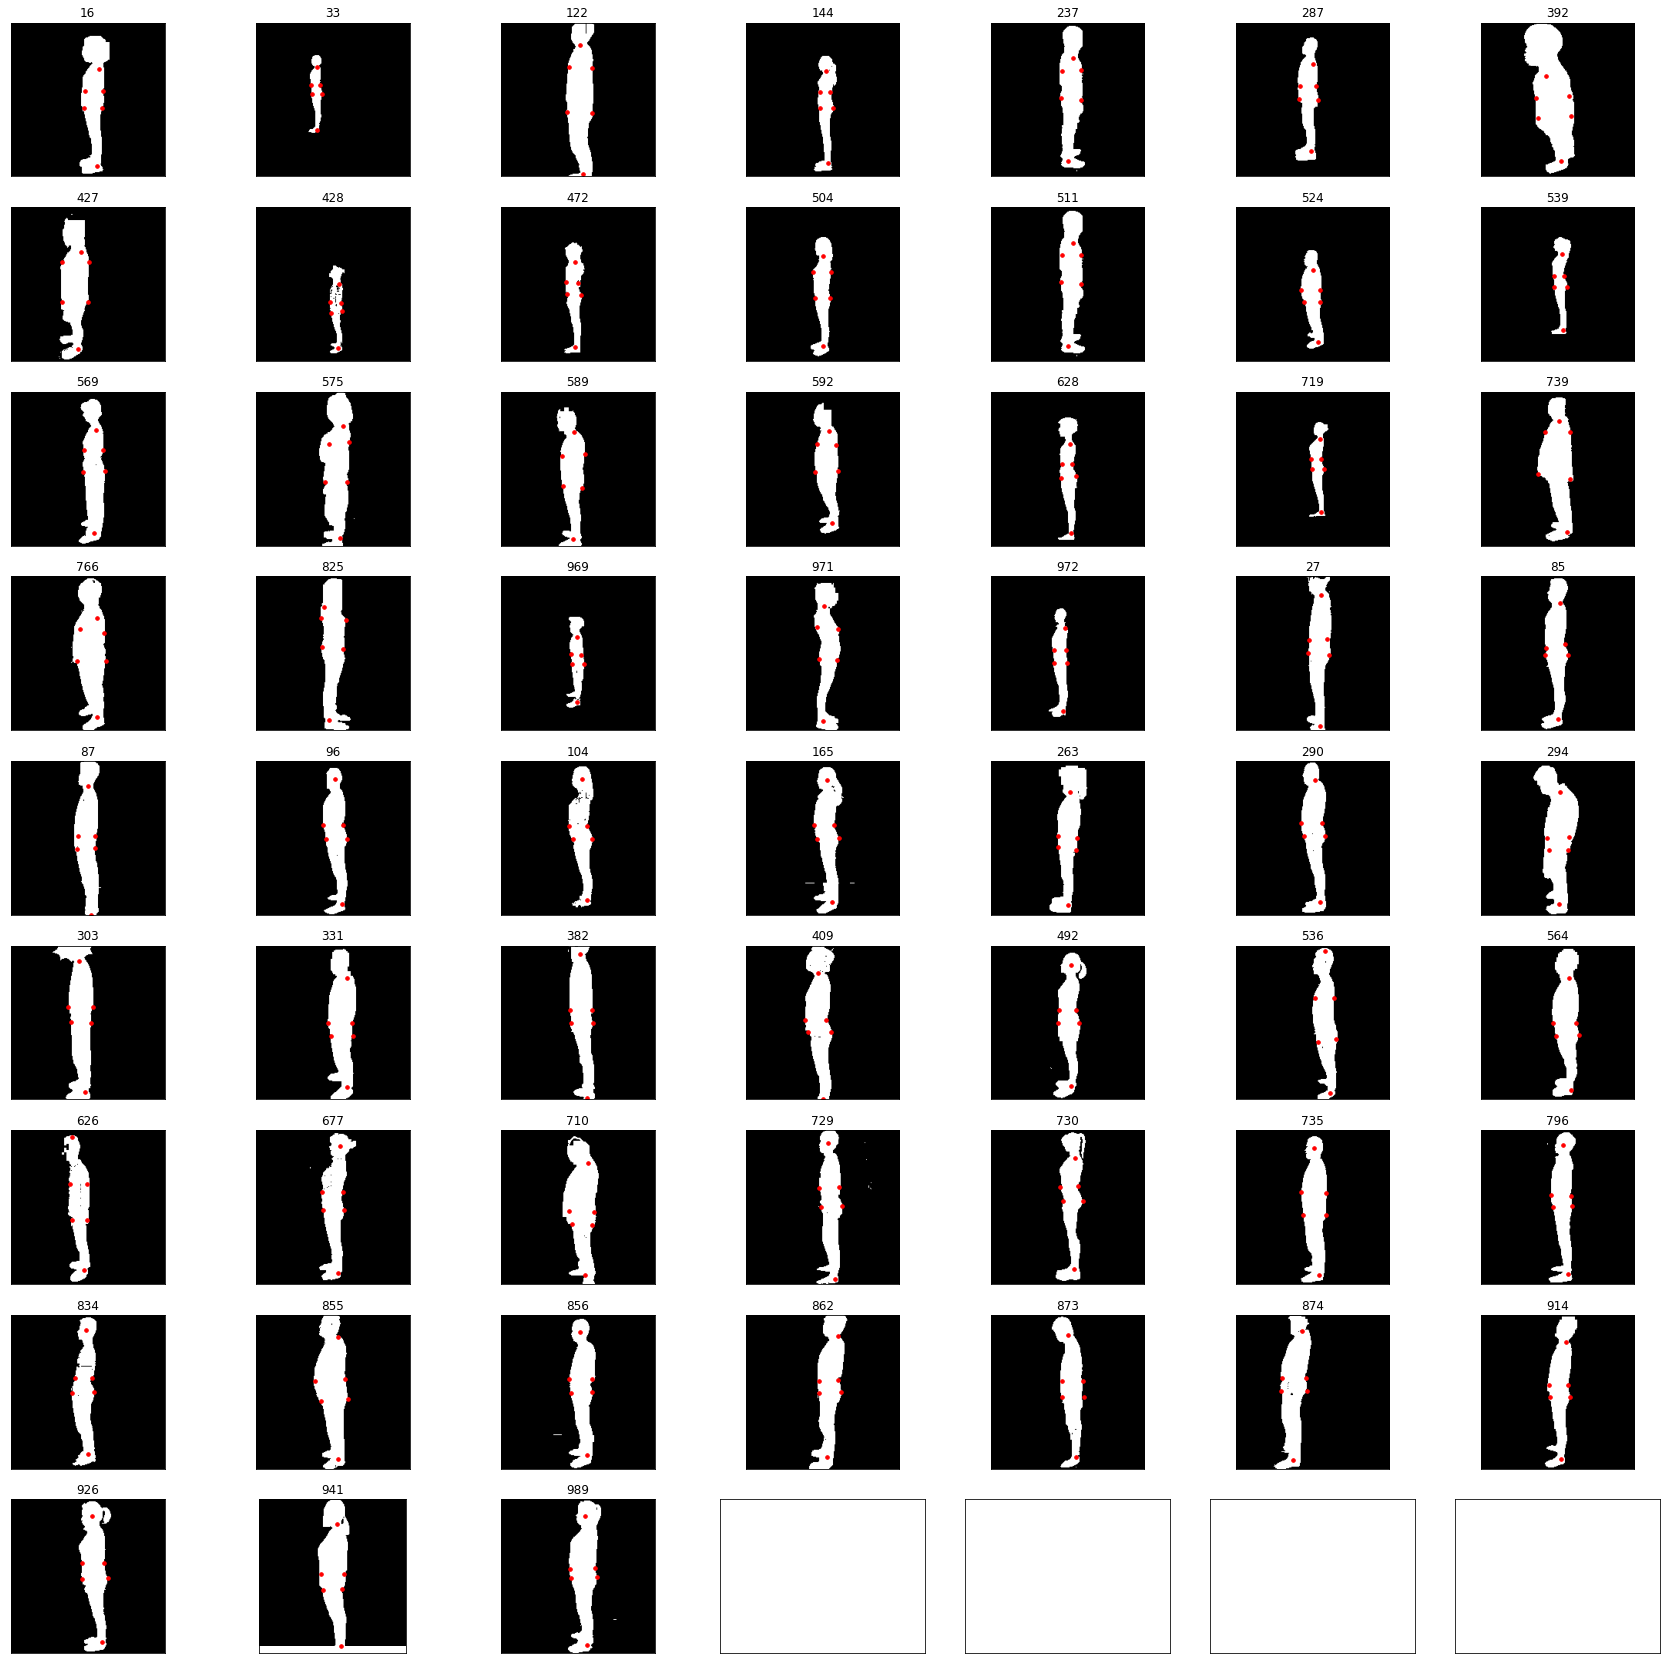

In [46]:
# subplot the second feature outlier
outlier_side2_idx=[16,  33, 122, 144, 237, 287, 392, 427, 428, 472, 504, 511, 524,
       539, 569, 575, 589, 592, 628, 719, 739, 766, 825, 969, 971, 972,27,  85,  87,  96, 104, 165, 263, 290, 294, 303, 331, 382, 409,
       492, 536, 564, 626, 677, 710, 729, 730, 735, 796, 834, 855, 856,
       862, 873, 874, 914, 926, 941, 989]
fig, axes = plt.subplots(9, 7, figsize=(30, 30),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlier_side2_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Plot top-30 outliers for side view

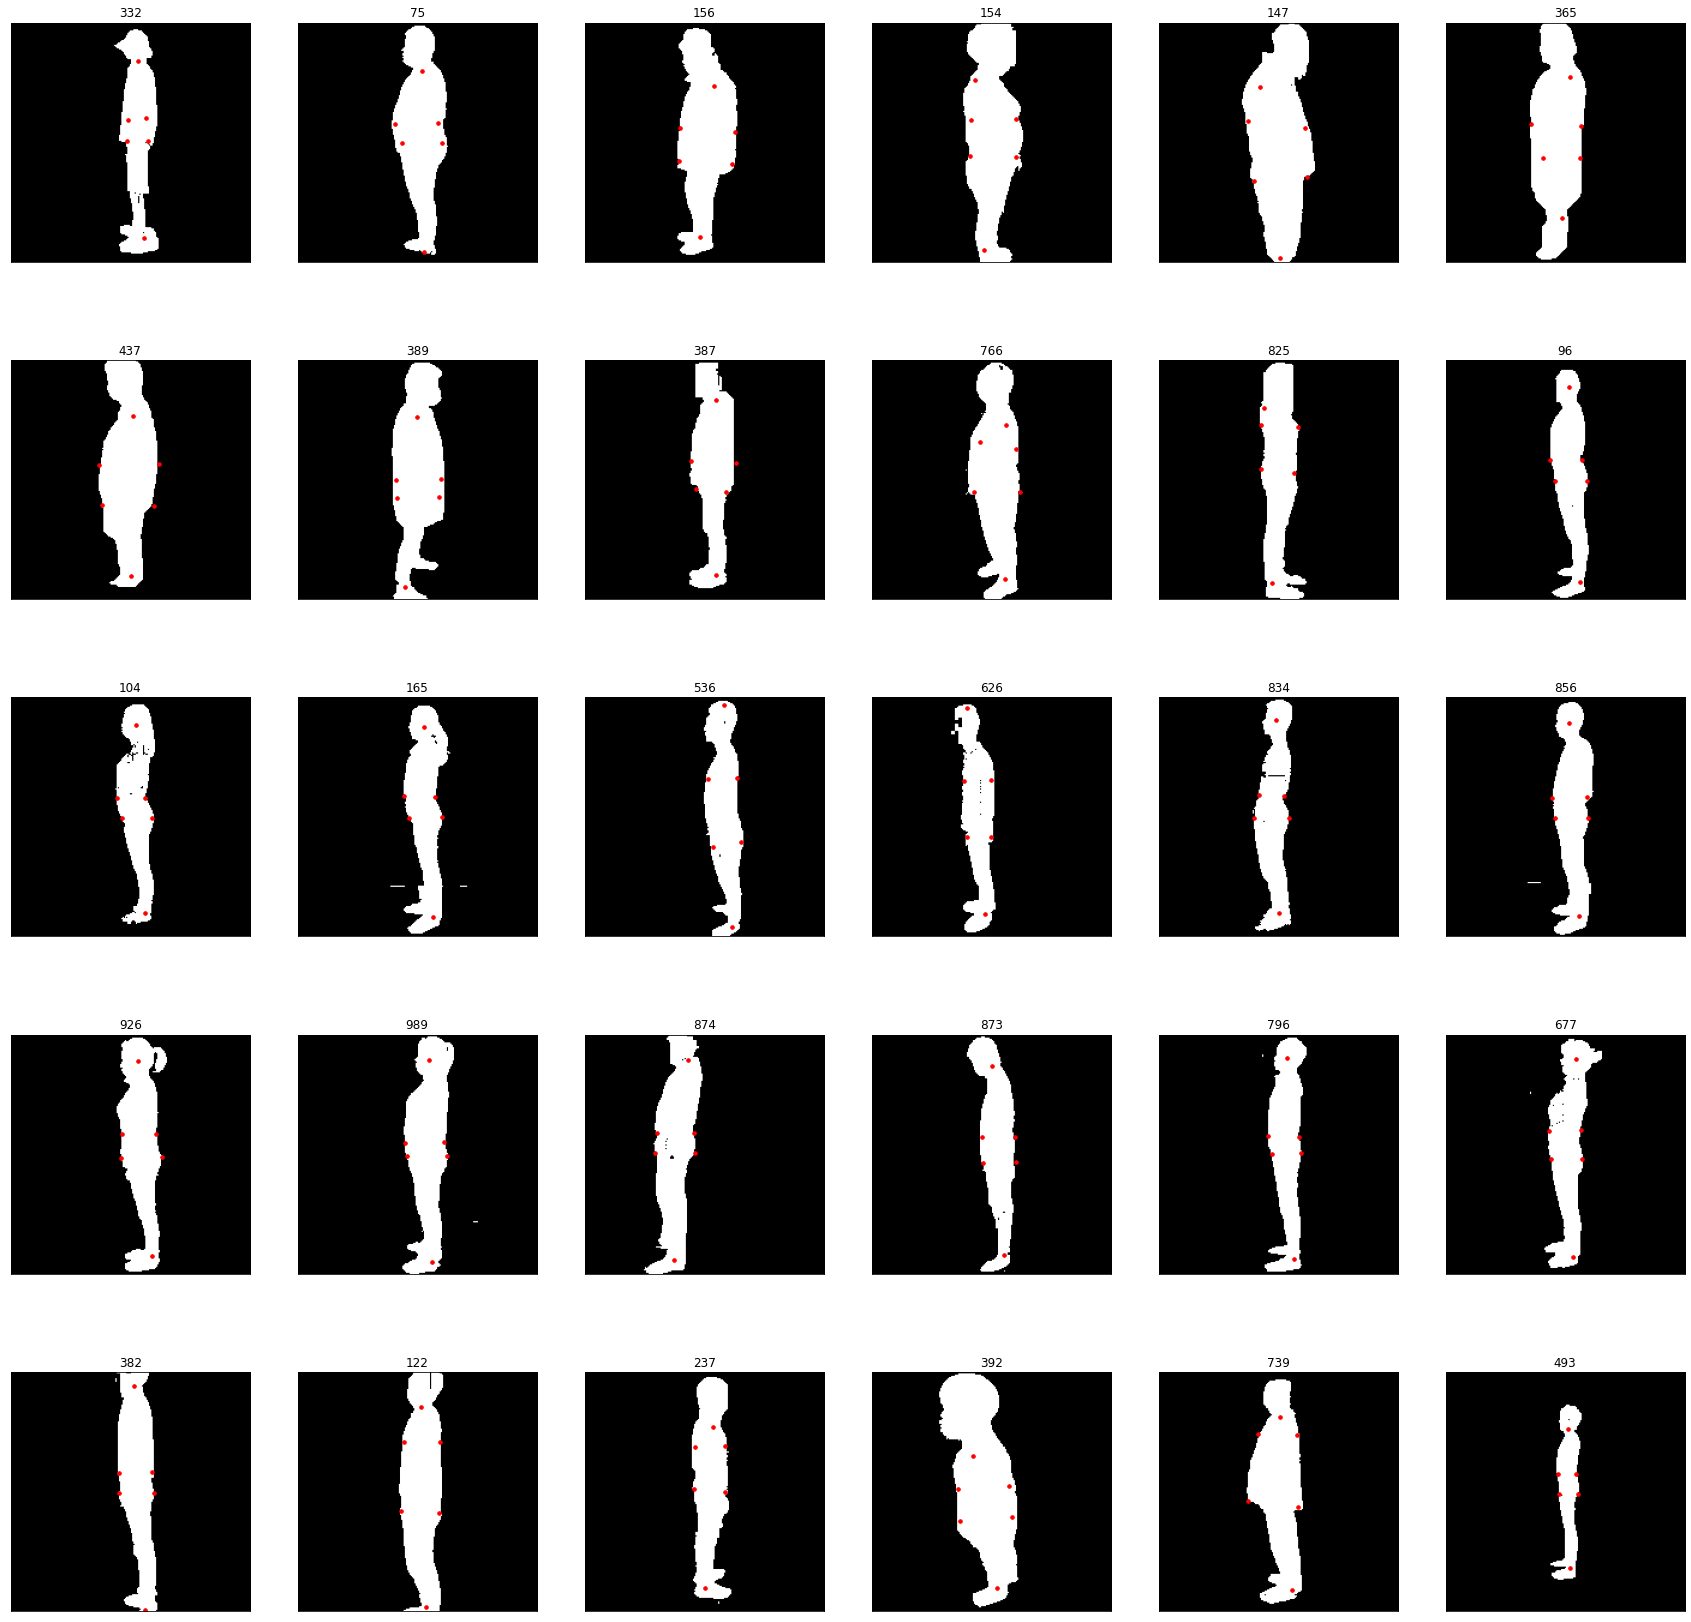

In [47]:
# by viewing all the outlier for side view
# I manually choose the top-30 outliers through the formal three features 
# Plot top-30 outlier for side view
outlierall_side_idx=[332,75,156,154,147,365,437,389,387,766,825,96,
                     104,165,536,626,834,856,926,989,874,
                     873,796,677,382,122,237,392,739,493]
fig, axes = plt.subplots(5, 6, figsize=(30, 30),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(outlierall_side_idx, IMG_S_TRAIN[idx,:,:], axes.ravel()):
  keypoints = (KPT_S_TRAIN[idx,:,:]+0.5)*IMG_SIZE
  ax.imshow(IMG_S_TRAIN[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))